In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import nltk
import string
import seaborn
import re
import string as sns  # Tutorial about Python regular expressions: https://pymotw.com/2/re/
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter 
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm



C:\Users\hp\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
lstm_ar = pd.read_csv('Reviews.csv', nrows = 10000)
lstm_ar.shape

(10000, 10)

In [5]:
lstm_ar.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Cleaning

In [6]:
lstm_ar = lstm_ar[lstm_ar.HelpfulnessNumerator <= lstm_ar.HelpfulnessDenominator]

In [7]:
lstm_ar.drop_duplicates(subset = {'UserId','ProfileName','Time'} ,keep = 'first', inplace = True)


In [8]:
def cleanhtml(sent):
    cleanr = re.compile('<.*?>')
    cleaned = re.sub(cleanr,' ',sent)
    return cleaned
def cleanpunc(sent):
    clean = re.sub(r'[?|!|$|#|\'|"|:]',r'',sent)
    clean = re.sub(r'[,|(|)|.|\|/]',r' ',clean)
    return clean

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop = set(stopwords.words("english"))
st = PorterStemmer()

In [11]:
import re
i=0
final_string = []
stem_data = " "
for p in lstm_ar['Text'].values:
    filtered_sens = []#filtered word
    p = cleanhtml(p)
    for w in p.split():
       # print(w)
        punc = cleanpunc(w)
        for s in punc.split():
            #print(w)
            if (s.isalpha()) & (len(s)>2):
                if s.lower() not in stop:
                    stem_data = (st.stem(s.lower())).encode('utf8')
                    filtered_sens.append(stem_data)
                else:
                    continue
            else:
                continue
    #print(filtered_sens)
    str1 = b" ".join(filtered_sens)
    #print(str1)
    final_string.append(str1)
    i+=1

In [12]:
lstm_ar['cleaned_text']=final_string  
lstm_ar['cleaned_text']=lstm_ar['cleaned_text'].str.decode("utf-8")

In [13]:
vocab = dict()
for sent in lstm_ar['cleaned_text'].values:
    for word in sent.split():
        if word not in vocab.keys():
            vocab[word] = 1
        else:
            vocab[word] += 1

In [14]:
import operator
sorted_dict = sorted(vocab.items(), key=operator.itemgetter(1),reverse = True)

In [15]:
ranking = dict()
rank = 1
for i in range(len(sorted_dict)):
    k = sorted_dict[i][0]
    ranking[k] = rank
    rank+=1

In [16]:
X = []
for sent in lstm_ar['cleaned_text'].values:
    row_ = []
    for word in sent.split():
        row_.append(ranking[word])
    X.append(row_)

In [17]:
import numpy as np
y = lstm_ar['Score']
change = lambda x : 1 if x == 'positive' else 0
y = np.array([change(x) for x in y])

<h2> Spliting Data Into Train And Test Data </h2>

In [18]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle = False)

In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


# Model LSTM With 1 layer 

In [26]:
#https://github.com/Manish-12/LSTM-on-amazon-fine-food-reviews/blob/master/LSTM_Amazon.ipynb
max_review_length = 300

x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

print(x_train.shape)
print(x_train[1])

(6584, 300)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0

In [30]:
from keras.layers import Dropout
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(len(vocab.keys())+1, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.25))

model.add(LSTM(32))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 300, 32)           381504    
_________________________________________________________________
dropout_15 (Dropout)         (None, 300, 32)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 389,857
Trainable params: 389,857
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
history = model.fit(x_train, y_train, epochs = 10, batch_size=128, verbose=1, validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 6584 samples, validate on 2823 samples
Epoch 1/10
6584/6584 [==============================] - ETA: 2:17 - loss: 0.6927 - acc: 0.507 - ETA: 1:19 - loss: 0.6906 - acc: 0.656 - ETA: 59s - loss: 0.6885 - acc: 0.760 - ETA: 49s - loss: 0.6861 - acc: 0.82 - ETA: 43s - loss: 0.6836 - acc: 0.85 - ETA: 39s - loss: 0.6809 - acc: 0.88 - ETA: 36s - loss: 0.6780 - acc: 0.89 - ETA: 33s - loss: 0.6751 - acc: 0.91 - ETA: 31s - loss: 0.6722 - acc: 0.92 - ETA: 29s - loss: 0.6688 - acc: 0.92 - ETA: 28s - loss: 0.6652 - acc: 0.93 - ETA: 26s - loss: 0.6614 - acc: 0.94 - ETA: 25s - loss: 0.6571 - acc: 0.94 - ETA: 24s - loss: 0.6528 - acc: 0.94 - ETA: 23s - loss: 0.6482 - acc: 0.95 - ETA: 22s - loss: 0.6431 - acc: 0.95 - ETA: 21s - loss: 0.6376 - acc: 0.95 - ETA: 20s - loss: 0.6314 - acc: 0.96 - ETA: 19s - loss: 0.6245 - acc: 0.96 - ETA: 18s - loss: 0.6167 - acc: 0.96 - ETA: 18s - loss: 0.6076 - acc: 0.96 - ETA: 17s - loss: 0.5972 - acc: 0.96 - ETA: 16s - loss: 0.5848 - acc: 0.96 - ETA: 16s - loss: 

6584/6584 [==============================] - ETA: 25s - loss: 4.0142e-04 - acc: 1.00 - ETA: 23s - loss: 4.0348e-04 - acc: 1.00 - ETA: 23s - loss: 4.1305e-04 - acc: 1.00 - ETA: 23s - loss: 3.9975e-04 - acc: 1.00 - ETA: 22s - loss: 4.0406e-04 - acc: 1.00 - ETA: 22s - loss: 4.1187e-04 - acc: 1.00 - ETA: 21s - loss: 4.2638e-04 - acc: 1.00 - ETA: 21s - loss: 4.2224e-04 - acc: 1.00 - ETA: 20s - loss: 4.1611e-04 - acc: 1.00 - ETA: 20s - loss: 4.1746e-04 - acc: 1.00 - ETA: 19s - loss: 4.1143e-04 - acc: 1.00 - ETA: 19s - loss: 4.1452e-04 - acc: 1.00 - ETA: 18s - loss: 4.1823e-04 - acc: 1.00 - ETA: 18s - loss: 4.1722e-04 - acc: 1.00 - ETA: 17s - loss: 4.1136e-04 - acc: 1.00 - ETA: 17s - loss: 4.1721e-04 - acc: 1.00 - ETA: 16s - loss: 4.1463e-04 - acc: 1.00 - ETA: 16s - loss: 4.1225e-04 - acc: 1.00 - ETA: 15s - loss: 4.0856e-04 - acc: 1.00 - ETA: 15s - loss: 4.0741e-04 - acc: 1.00 - ETA: 14s - loss: 4.1075e-04 - acc: 1.00 - ETA: 14s - loss: 4.1219e-04 - acc: 1.00 - ETA: 13s - loss: 4.1141e-04 - a

In [32]:
model.fit(x_train, y_train, nb_epoch=10, batch_size=64)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
6584/6584 [==============================] - ETA: 33s - loss: 2.0413e-04 - acc: 1.00 - ETA: 31s - loss: 2.3009e-04 - acc: 1.00 - ETA: 31s - loss: 2.1282e-04 - acc: 1.00 - ETA: 29s - loss: 2.1541e-04 - acc: 1.00 - ETA: 28s - loss: 2.0698e-04 - acc: 1.00 - ETA: 28s - loss: 2.0252e-04 - acc: 1.00 - ETA: 28s - loss: 1.9562e-04 - acc: 1.00 - ETA: 27s - loss: 2.0158e-04 - acc: 1.00 - ETA: 27s - loss: 2.0534e-04 - acc: 1.00 - ETA: 26s - loss: 2.0217e-04 - acc: 1.00 - ETA: 26s - loss: 2.0726e-04 - acc: 1.00 - ETA: 26s - loss: 2.0783e-04 - acc: 1.00 - ETA: 25s - loss: 2.0872e-04 - acc: 1.00 - ETA: 25s - loss: 2.0795e-04 - acc: 1.00 - ETA: 25s - loss: 2.0782e-04 - acc: 1.00 - ETA: 24s - loss: 2.0632e-04 - acc: 1.00 - ETA: 24s - loss: 2.0288e-04 - acc: 1.00 - ETA: 24s - loss: 2.0661e-04 - acc: 1.00 - ETA: 23s - loss: 2.0865e-04 - acc: 1.00 - ETA: 23s - loss: 2.1103e-04 - acc: 1.00 - ETA: 23s - loss: 2.0874e-04 - acc: 1.00 - ETA: 23s - loss: 2.1300e-04 - acc: 1.00 - ETA: 22s - loss: 2.1

6584/6584 [==============================] - ETA: 28s - loss: 2.0558e-04 - acc: 1.00 - ETA: 26s - loss: 2.0901e-04 - acc: 1.00 - ETA: 26s - loss: 1.9435e-04 - acc: 1.00 - ETA: 26s - loss: 1.9203e-04 - acc: 1.00 - ETA: 26s - loss: 1.8365e-04 - acc: 1.00 - ETA: 25s - loss: 1.7484e-04 - acc: 1.00 - ETA: 25s - loss: 1.6990e-04 - acc: 1.00 - ETA: 25s - loss: 1.6696e-04 - acc: 1.00 - ETA: 24s - loss: 1.6389e-04 - acc: 1.00 - ETA: 24s - loss: 1.6135e-04 - acc: 1.00 - ETA: 24s - loss: 1.6971e-04 - acc: 1.00 - ETA: 24s - loss: 1.6475e-04 - acc: 1.00 - ETA: 23s - loss: 1.6840e-04 - acc: 1.00 - ETA: 23s - loss: 1.6894e-04 - acc: 1.00 - ETA: 23s - loss: 1.6586e-04 - acc: 1.00 - ETA: 23s - loss: 1.6488e-04 - acc: 1.00 - ETA: 22s - loss: 1.6275e-04 - acc: 1.00 - ETA: 22s - loss: 1.6002e-04 - acc: 1.00 - ETA: 22s - loss: 1.6089e-04 - acc: 1.00 - ETA: 22s - loss: 1.6315e-04 - acc: 1.00 - ETA: 21s - loss: 1.6361e-04 - acc: 1.00 - ETA: 21s - loss: 1.6338e-04 - acc: 1.00 - ETA: 21s - loss: 1.6086e-04 - a

6584/6584 [==============================] - ETA: 40s - loss: 1.1458e-04 - acc: 1.00 - ETA: 35s - loss: 1.1863e-04 - acc: 1.00 - ETA: 35s - loss: 1.1911e-04 - acc: 1.00 - ETA: 39s - loss: 1.1490e-04 - acc: 1.00 - ETA: 38s - loss: 1.1130e-04 - acc: 1.00 - ETA: 36s - loss: 1.1179e-04 - acc: 1.00 - ETA: 35s - loss: 1.1840e-04 - acc: 1.00 - ETA: 34s - loss: 1.1650e-04 - acc: 1.00 - ETA: 33s - loss: 1.1555e-04 - acc: 1.00 - ETA: 32s - loss: 1.1434e-04 - acc: 1.00 - ETA: 31s - loss: 1.1810e-04 - acc: 1.00 - ETA: 30s - loss: 1.3384e-04 - acc: 1.00 - ETA: 30s - loss: 1.3302e-04 - acc: 1.00 - ETA: 29s - loss: 1.3303e-04 - acc: 1.00 - ETA: 29s - loss: 1.3270e-04 - acc: 1.00 - ETA: 29s - loss: 1.3236e-04 - acc: 1.00 - ETA: 29s - loss: 1.3394e-04 - acc: 1.00 - ETA: 29s - loss: 1.3391e-04 - acc: 1.00 - ETA: 28s - loss: 1.3218e-04 - acc: 1.00 - ETA: 28s - loss: 1.3032e-04 - acc: 1.00 - ETA: 27s - loss: 1.2913e-04 - acc: 1.00 - ETA: 27s - loss: 1.2926e-04 - acc: 1.00 - ETA: 26s - loss: 1.2851e-04 - a

6584/6584 [==============================] - ETA: 27s - loss: 7.9511e-05 - acc: 1.00 - ETA: 27s - loss: 9.2177e-05 - acc: 1.00 - ETA: 27s - loss: 9.0251e-05 - acc: 1.00 - ETA: 27s - loss: 8.8493e-05 - acc: 1.00 - ETA: 27s - loss: 9.1711e-05 - acc: 1.00 - ETA: 26s - loss: 8.9135e-05 - acc: 1.00 - ETA: 26s - loss: 8.9234e-05 - acc: 1.00 - ETA: 26s - loss: 8.8202e-05 - acc: 1.00 - ETA: 25s - loss: 8.6252e-05 - acc: 1.00 - ETA: 25s - loss: 8.8397e-05 - acc: 1.00 - ETA: 25s - loss: 9.2845e-05 - acc: 1.00 - ETA: 25s - loss: 9.2861e-05 - acc: 1.00 - ETA: 24s - loss: 9.2241e-05 - acc: 1.00 - ETA: 24s - loss: 9.0876e-05 - acc: 1.00 - ETA: 24s - loss: 9.1806e-05 - acc: 1.00 - ETA: 23s - loss: 9.3968e-05 - acc: 1.00 - ETA: 23s - loss: 9.3801e-05 - acc: 1.00 - ETA: 23s - loss: 9.3689e-05 - acc: 1.00 - ETA: 23s - loss: 9.3383e-05 - acc: 1.00 - ETA: 22s - loss: 9.2890e-05 - acc: 1.00 - ETA: 22s - loss: 9.6274e-05 - acc: 1.00 - ETA: 22s - loss: 9.6016e-05 - acc: 1.00 - ETA: 21s - loss: 9.5680e-05 - a

6584/6584 [==============================] - ETA: 35s - loss: 7.4034e-05 - acc: 1.00 - ETA: 30s - loss: 9.3080e-05 - acc: 1.00 - ETA: 29s - loss: 8.6855e-05 - acc: 1.00 - ETA: 28s - loss: 7.8522e-05 - acc: 1.00 - ETA: 27s - loss: 7.8349e-05 - acc: 1.00 - ETA: 26s - loss: 7.3957e-05 - acc: 1.00 - ETA: 26s - loss: 7.2471e-05 - acc: 1.00 - ETA: 25s - loss: 7.0783e-05 - acc: 1.00 - ETA: 25s - loss: 6.7699e-05 - acc: 1.00 - ETA: 25s - loss: 6.9581e-05 - acc: 1.00 - ETA: 25s - loss: 6.9442e-05 - acc: 1.00 - ETA: 24s - loss: 7.4102e-05 - acc: 1.00 - ETA: 24s - loss: 7.4902e-05 - acc: 1.00 - ETA: 24s - loss: 7.6436e-05 - acc: 1.00 - ETA: 23s - loss: 7.5241e-05 - acc: 1.00 - ETA: 23s - loss: 7.5723e-05 - acc: 1.00 - ETA: 23s - loss: 7.6666e-05 - acc: 1.00 - ETA: 23s - loss: 7.6485e-05 - acc: 1.00 - ETA: 22s - loss: 7.6916e-05 - acc: 1.00 - ETA: 22s - loss: 7.5810e-05 - acc: 1.00 - ETA: 22s - loss: 7.5398e-05 - acc: 1.00 - ETA: 22s - loss: 7.7062e-05 - acc: 1.00 - ETA: 21s - loss: 7.7416e-05 - a

<h2> PLOT </h2>

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    
    plt.legend()
    plt.grid()
    fig.canvas.draw()

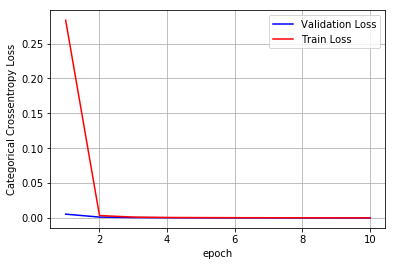

In [34]:
nb_epoch = 10
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model LSTM With 2 Layers

In [35]:
from keras.layers import Dropout
embedding_vecor_length = 32
model_2 = Sequential()
model_2.add(Embedding(len(vocab.keys())+1, embedding_vecor_length, input_length=max_review_length))
model_2.add(Dropout(0.35))

model_2.add(LSTM(32))
model_2.add(Dropout(0.35))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 300, 32)           381504    
_________________________________________________________________
dropout_17 (Dropout)         (None, 300, 32)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 389,857
Trainable params: 389,857
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
history = model_2.fit(x_train, y_train, epochs = 20, batch_size=128, verbose=1, validation_data=(x_test, y_test))
scores_2 = model_2.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores_2[1]*100))

Train on 6584 samples, validate on 2823 samples
Epoch 1/20
6584/6584 [==============================] - ETA: 1:53 - loss: 0.6950 - acc: 0.390 - ETA: 1:07 - loss: 0.6919 - acc: 0.554 - ETA: 51s - loss: 0.6896 - acc: 0.661 - ETA: 43s - loss: 0.6877 - acc: 0.73 - ETA: 38s - loss: 0.6857 - acc: 0.78 - ETA: 35s - loss: 0.6835 - acc: 0.81 - ETA: 32s - loss: 0.6815 - acc: 0.84 - ETA: 30s - loss: 0.6791 - acc: 0.86 - ETA: 28s - loss: 0.6767 - acc: 0.87 - ETA: 26s - loss: 0.6742 - acc: 0.88 - ETA: 25s - loss: 0.6713 - acc: 0.89 - ETA: 24s - loss: 0.6686 - acc: 0.90 - ETA: 23s - loss: 0.6655 - acc: 0.91 - ETA: 22s - loss: 0.6624 - acc: 0.92 - ETA: 21s - loss: 0.6592 - acc: 0.92 - ETA: 20s - loss: 0.6556 - acc: 0.93 - ETA: 19s - loss: 0.6517 - acc: 0.93 - ETA: 19s - loss: 0.6474 - acc: 0.93 - ETA: 18s - loss: 0.6429 - acc: 0.94 - ETA: 17s - loss: 0.6380 - acc: 0.94 - ETA: 16s - loss: 0.6328 - acc: 0.94 - ETA: 16s - loss: 0.6270 - acc: 0.94 - ETA: 15s - loss: 0.6204 - acc: 0.95 - ETA: 15s - loss: 

6584/6584 [==============================] - ETA: 22s - loss: 6.2846e-04 - acc: 1.00 - ETA: 22s - loss: 6.6408e-04 - acc: 1.00 - ETA: 22s - loss: 6.6512e-04 - acc: 1.00 - ETA: 22s - loss: 7.7197e-04 - acc: 1.00 - ETA: 21s - loss: 7.6190e-04 - acc: 1.00 - ETA: 21s - loss: 7.5985e-04 - acc: 1.00 - ETA: 21s - loss: 7.7546e-04 - acc: 1.00 - ETA: 20s - loss: 7.6172e-04 - acc: 1.00 - ETA: 20s - loss: 7.5499e-04 - acc: 1.00 - ETA: 19s - loss: 7.4492e-04 - acc: 1.00 - ETA: 19s - loss: 7.4042e-04 - acc: 1.00 - ETA: 18s - loss: 7.3056e-04 - acc: 1.00 - ETA: 18s - loss: 7.4846e-04 - acc: 1.00 - ETA: 17s - loss: 7.4888e-04 - acc: 1.00 - ETA: 17s - loss: 7.4519e-04 - acc: 1.00 - ETA: 16s - loss: 7.5398e-04 - acc: 1.00 - ETA: 16s - loss: 7.4719e-04 - acc: 1.00 - ETA: 15s - loss: 7.3639e-04 - acc: 1.00 - ETA: 15s - loss: 7.4291e-04 - acc: 1.00 - ETA: 14s - loss: 7.3949e-04 - acc: 1.00 - ETA: 14s - loss: 7.3795e-04 - acc: 1.00 - ETA: 13s - loss: 7.3910e-04 - acc: 1.00 - ETA: 13s - loss: 7.4171e-04 - a

6584/6584 [==============================] - ETA: 23s - loss: 3.2473e-04 - acc: 1.00 - ETA: 23s - loss: 3.3353e-04 - acc: 1.00 - ETA: 23s - loss: 3.4373e-04 - acc: 1.00 - ETA: 23s - loss: 3.3991e-04 - acc: 1.00 - ETA: 22s - loss: 3.4803e-04 - acc: 1.00 - ETA: 22s - loss: 3.7885e-04 - acc: 1.00 - ETA: 21s - loss: 3.6362e-04 - acc: 1.00 - ETA: 21s - loss: 3.6230e-04 - acc: 1.00 - ETA: 20s - loss: 3.6502e-04 - acc: 1.00 - ETA: 20s - loss: 3.7332e-04 - acc: 1.00 - ETA: 19s - loss: 3.6587e-04 - acc: 1.00 - ETA: 19s - loss: 3.6258e-04 - acc: 1.00 - ETA: 18s - loss: 3.5523e-04 - acc: 1.00 - ETA: 18s - loss: 3.5469e-04 - acc: 1.00 - ETA: 17s - loss: 3.4847e-04 - acc: 1.00 - ETA: 17s - loss: 3.4226e-04 - acc: 1.00 - ETA: 16s - loss: 3.4100e-04 - acc: 1.00 - ETA: 16s - loss: 3.3932e-04 - acc: 1.00 - ETA: 15s - loss: 3.3679e-04 - acc: 1.00 - ETA: 15s - loss: 3.3813e-04 - acc: 1.00 - ETA: 14s - loss: 3.3971e-04 - acc: 1.00 - ETA: 14s - loss: 3.4234e-04 - acc: 1.00 - ETA: 13s - loss: 3.4181e-04 - a

6584/6584 [==============================] - ETA: 23s - loss: 2.7381e-04 - acc: 1.00 - ETA: 22s - loss: 2.8047e-04 - acc: 1.00 - ETA: 22s - loss: 2.5280e-04 - acc: 1.00 - ETA: 21s - loss: 2.3521e-04 - acc: 1.00 - ETA: 21s - loss: 2.2239e-04 - acc: 1.00 - ETA: 21s - loss: 2.2370e-04 - acc: 1.00 - ETA: 20s - loss: 2.1571e-04 - acc: 1.00 - ETA: 20s - loss: 2.0888e-04 - acc: 1.00 - ETA: 19s - loss: 2.1841e-04 - acc: 1.00 - ETA: 19s - loss: 2.1491e-04 - acc: 1.00 - ETA: 18s - loss: 2.1273e-04 - acc: 1.00 - ETA: 18s - loss: 2.0950e-04 - acc: 1.00 - ETA: 17s - loss: 2.1181e-04 - acc: 1.00 - ETA: 17s - loss: 2.1512e-04 - acc: 1.00 - ETA: 17s - loss: 2.1507e-04 - acc: 1.00 - ETA: 16s - loss: 2.1454e-04 - acc: 1.00 - ETA: 16s - loss: 2.1351e-04 - acc: 1.00 - ETA: 15s - loss: 2.1200e-04 - acc: 1.00 - ETA: 15s - loss: 2.1080e-04 - acc: 1.00 - ETA: 15s - loss: 2.1011e-04 - acc: 1.00 - ETA: 14s - loss: 2.0849e-04 - acc: 1.00 - ETA: 14s - loss: 2.1060e-04 - acc: 1.00 - ETA: 14s - loss: 2.1141e-04 - a

In [37]:
print("Accuracy: %.2f%%" % (scores_2[1]*100))

Accuracy: 100.00%


In [38]:
model_2.fit(x_train, y_train, nb_epoch=20, batch_size=128)

scores = model_2.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
6584/6584 [==============================] - ETA: 24s - loss: 1.6492e-04 - acc: 1.00 - ETA: 23s - loss: 1.6427e-04 - acc: 1.00 - ETA: 23s - loss: 1.5974e-04 - acc: 1.00 - ETA: 22s - loss: 1.6365e-04 - acc: 1.00 - ETA: 22s - loss: 1.6569e-04 - acc: 1.00 - ETA: 21s - loss: 1.6272e-04 - acc: 1.00 - ETA: 20s - loss: 1.7101e-04 - acc: 1.00 - ETA: 20s - loss: 1.7338e-04 - acc: 1.00 - ETA: 19s - loss: 1.7539e-04 - acc: 1.00 - ETA: 19s - loss: 1.7048e-04 - acc: 1.00 - ETA: 18s - loss: 1.7514e-04 - acc: 1.00 - ETA: 18s - loss: 1.7882e-04 - acc: 1.00 - ETA: 17s - loss: 1.8084e-04 - acc: 1.00 - ETA: 17s - loss: 1.8213e-04 - acc: 1.00 - ETA: 17s - loss: 1.8400e-04 - acc: 1.00 - ETA: 16s - loss: 1.8117e-04 - acc: 1.00 - ETA: 16s - loss: 1.8209e-04 - acc: 1.00 - ETA: 15s - loss: 1.8164e-04 - acc: 1.00 - ETA: 15s - loss: 1.8368e-04 - acc: 1.00 - ETA: 14s - loss: 1.8512e-04 - acc: 1.00 - ETA: 14s - loss: 1.8496e-04 - acc: 1.00 - ETA: 13s - loss: 1.8493e-04 - acc: 1.00 - ETA: 13s - loss: 1.8

6584/6584 [==============================] - ETA: 25s - loss: 1.6054e-04 - acc: 1.00 - ETA: 24s - loss: 1.5377e-04 - acc: 1.00 - ETA: 23s - loss: 1.5030e-04 - acc: 1.00 - ETA: 22s - loss: 1.3903e-04 - acc: 1.00 - ETA: 22s - loss: 1.6719e-04 - acc: 1.00 - ETA: 21s - loss: 1.5840e-04 - acc: 1.00 - ETA: 21s - loss: 1.4949e-04 - acc: 1.00 - ETA: 20s - loss: 1.5021e-04 - acc: 1.00 - ETA: 20s - loss: 1.4975e-04 - acc: 1.00 - ETA: 19s - loss: 1.4459e-04 - acc: 1.00 - ETA: 19s - loss: 1.4435e-04 - acc: 1.00 - ETA: 18s - loss: 1.5342e-04 - acc: 1.00 - ETA: 18s - loss: 1.4932e-04 - acc: 1.00 - ETA: 17s - loss: 1.4426e-04 - acc: 1.00 - ETA: 17s - loss: 1.4420e-04 - acc: 1.00 - ETA: 16s - loss: 1.4263e-04 - acc: 1.00 - ETA: 16s - loss: 1.4076e-04 - acc: 1.00 - ETA: 15s - loss: 1.4050e-04 - acc: 1.00 - ETA: 15s - loss: 1.3932e-04 - acc: 1.00 - ETA: 14s - loss: 1.3603e-04 - acc: 1.00 - ETA: 14s - loss: 1.3541e-04 - acc: 1.00 - ETA: 13s - loss: 1.3821e-04 - acc: 1.00 - ETA: 13s - loss: 1.3767e-04 - a

6584/6584 [==============================] - ETA: 23s - loss: 1.1727e-04 - acc: 1.00 - ETA: 22s - loss: 1.2128e-04 - acc: 1.00 - ETA: 22s - loss: 1.1381e-04 - acc: 1.00 - ETA: 21s - loss: 1.0499e-04 - acc: 1.00 - ETA: 21s - loss: 9.9801e-05 - acc: 1.00 - ETA: 20s - loss: 9.5838e-05 - acc: 1.00 - ETA: 20s - loss: 9.6581e-05 - acc: 1.00 - ETA: 19s - loss: 9.9464e-05 - acc: 1.00 - ETA: 19s - loss: 9.7116e-05 - acc: 1.00 - ETA: 19s - loss: 9.7093e-05 - acc: 1.00 - ETA: 18s - loss: 9.8695e-05 - acc: 1.00 - ETA: 18s - loss: 9.9110e-05 - acc: 1.00 - ETA: 17s - loss: 9.7299e-05 - acc: 1.00 - ETA: 17s - loss: 9.5834e-05 - acc: 1.00 - ETA: 16s - loss: 9.5012e-05 - acc: 1.00 - ETA: 16s - loss: 9.5163e-05 - acc: 1.00 - ETA: 15s - loss: 9.5700e-05 - acc: 1.00 - ETA: 15s - loss: 9.4108e-05 - acc: 1.00 - ETA: 14s - loss: 9.3419e-05 - acc: 1.00 - ETA: 14s - loss: 9.3667e-05 - acc: 1.00 - ETA: 14s - loss: 9.2438e-05 - acc: 1.00 - ETA: 13s - loss: 9.4338e-05 - acc: 1.00 - ETA: 13s - loss: 9.4855e-05 - a

6584/6584 [==============================] - ETA: 27s - loss: 1.0026e-04 - acc: 1.00 - ETA: 26s - loss: 8.8436e-05 - acc: 1.00 - ETA: 25s - loss: 9.2035e-05 - acc: 1.00 - ETA: 25s - loss: 9.1422e-05 - acc: 1.00 - ETA: 24s - loss: 9.5490e-05 - acc: 1.00 - ETA: 24s - loss: 9.3505e-05 - acc: 1.00 - ETA: 23s - loss: 8.9882e-05 - acc: 1.00 - ETA: 23s - loss: 8.4272e-05 - acc: 1.00 - ETA: 22s - loss: 8.1789e-05 - acc: 1.00 - ETA: 22s - loss: 8.1345e-05 - acc: 1.00 - ETA: 21s - loss: 8.1295e-05 - acc: 1.00 - ETA: 20s - loss: 8.0927e-05 - acc: 1.00 - ETA: 20s - loss: 8.9913e-05 - acc: 1.00 - ETA: 19s - loss: 8.7102e-05 - acc: 1.00 - ETA: 19s - loss: 8.5641e-05 - acc: 1.00 - ETA: 19s - loss: 8.5196e-05 - acc: 1.00 - ETA: 18s - loss: 8.2819e-05 - acc: 1.00 - ETA: 18s - loss: 8.3299e-05 - acc: 1.00 - ETA: 17s - loss: 8.1890e-05 - acc: 1.00 - ETA: 16s - loss: 8.2729e-05 - acc: 1.00 - ETA: 16s - loss: 8.2863e-05 - acc: 1.00 - ETA: 15s - loss: 8.3282e-05 - acc: 1.00 - ETA: 15s - loss: 8.3722e-05 - a

<h2> PLOT </h2>

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    
    plt.legend()
    plt.grid()
    fig.canvas.draw()

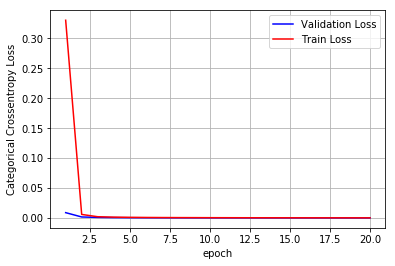

In [40]:
nb_epoch =20
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion Table

In [41]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Set", "Models","Layers", "Accurancy", "Val_Loss"]

x.add_row(["Set:-1", "LSTM ", 1, 100, 41.1634e-05])
x.add_row(["Set:-2", "LSTM", 2, 100, 67.3005e-05])

print(x)

+--------+--------+--------+-----------+-------------+
|  Set   | Models | Layers | Accurancy |   Val_Loss  |
+--------+--------+--------+-----------+-------------+
| Set:-1 | LSTM   |   1    |    100    | 0.000411634 |
| Set:-2 |  LSTM  |   2    |    100    | 0.000673005 |
+--------+--------+--------+-----------+-------------+


# Conclusion:-

1. Fist loaded an Amazon fine food reviews dataset and then do data cleaning and remove all hltm tages (Unwanted tags andrepeated words)
2. Then got all vocabulary and frequancy of each words and indexing the words in amazon reviews datset which is given as atext format and from there got cleaned text datasets and from there converted all amzon datapoints like imdb dataset format.
3. Then after converting now applied LSTM model with 1Layers and plot errorplot in it and after that applied LSTM with 2Layers and ploted a plot for it.

<h2>========================================================================</h2>